<a href="https://colab.research.google.com/github/FoodProcessInitiative/FlavorClassPrediction/blob/main/pred_radar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Flavor class prediction of pyrazines
Generated on 2025/04/10

by Yasushi Nakata, Organization for Research Promotion, Osaka Metropolitan University, Sakai, Osaka, 599-8531, Japan;

Email: yasushi.nakata@omu.ac.jp.

Preparation before excution: Upload the next data and model data.

- Input data file: coffee_dataset.csv
- model data files: files in model240610bk2.zip.  Upload them under '/content/drive/My Drive/model240610bk2'.


In [ ]:
!pip install numpy>=1.24 # Install NumPy version 1.24 or later
!pip install --pre deepchem # Reinstall deepchem after reinstalling NumPy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 904.4 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 17.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 41.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.3/34.3 MB 12.5 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


# After installing tensorflow, restart this session.

In [ ]:
!pip install tensorflow==2.12.0

INFO: pip is looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.0/586.0 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 40.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 41.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 48.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 52.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 20.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.6/79.6 MB 9.0 MB/s eta 0:00:00
  Atte

In [ ]:
import deepchem as dc
import numpy as np # import numpy
print('np', np.__version__) # Check NumPy version
print('dc', dc.__version__)

wandb: WARNING W&B installed but not logged in.  Run `wandb login` or set the WANDB_API_KEY env variable.
wandb: WARNING W&B installed but not logged in.  Run `wandb login` or set the WANDB_API_KEY env variable.


np 1.23.5
dc 2.8.1.dev


In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
fname = 'coffee_dataset.csv'    # Input pyrazines data
path0 = '/content/drive/My Drive/'
path = path0 + fname
df0 = pd.read_csv(path, sep=",", encoding = 'utf-8')
df0 = df0.drop(columns=['Unnamed: 0'])

In [ ]:
print(df0.head())

     CID                 IUPACName   CanonicalSMILES  Guatemala_mild  \
0   7976          2-methylpyrazine      CC1=NC=CN=C1             168   
1  31252      2,5-dimethylpyrazine   CC1=CN=C(C=N1)C             177   
2  26331           2-ethylpyrazine     CCC1=NC=CN=C1              52   
3  77840         2-ethenylpyrazine    C=CC1=NC=CN=C1               9   
4  26332  2-ethyl-6-methylpyrazine  CCC1=NC(=CN=C1)C              54   

   Guatemala_stand.  Brazil_mild  Brazil_stand.  Colombia_mild  \
0               194          182            210            137   
1               165          171            205            128   
2                63           41             50             49   
3                13           11             13              7   
4                66           54             58             40   

   Colombia_stand.  
0              141  
1              133  
2               60  
3               11  
4               43  


In [ ]:
#dataset file
print('Number of  foodb flavors:',len(df0))
df_dataset=df0[['IUPACName', 'CanonicalSMILES']].copy()
df_dataset['c1'] = 0
df_dataset['c2'] = 0
df_dataset['c3'] = 0
df_dataset['c4'] = 0
df_dataset['c5'] = 0
df_dataset['c6'] = 0
df_dataset['c7'] = 0
df_dataset['c8'] = 0
df_dataset['c9'] = 0
df_dataset['c10'] = 0
df_dataset['c11'] = 0
df_dataset['c12'] = 0
path = path0 + 'df_dataset.csv'
df_dataset.to_csv(path,encoding='utf-8_sig', index=False)
#model definition
dataset_file = path
tasks = ['c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9', 'c10', 'c11', 'c12']
featurizer = dc.feat.ConvMolFeaturizer()
loader = dc.data.CSVLoader(
    tasks=tasks,feature_field='CanonicalSMILES',featurizer=featurizer)
dataset =loader.featurize(dataset_file, shard_size=8192)
transformers = [
                dc.trans.NormalizationTransformer(
                    transform_y=True, dataset=dataset)
]

Number of  foodb flavors: 19


/usr/local/lib/python3.11/dist-packages/deepchem/data/data_loader.py:172: FutureWarning: featurize() is deprecated and has been renamed to create_dataset().featurize() will be removed in DeepChem 3.0
  warnings.warn(


In [ ]:
model = dc.models.GraphConvModel(n_tasks=len(tasks), mode= 'regression', dropout=0.2, model_dir='/content/drive/My Drive/model240610bk2')
model.restore()

In [ ]:
#class prediction
pred = model.predict_on_batch(dataset.X[:])
max_indices = np.argmax(pred, axis=1)
df0['class'] = max_indices + 1
print(df0)

       CID                         IUPACName       CanonicalSMILES  \
0     7976                  2-methylpyrazine          CC1=NC=CN=C1   
1    31252              2,5-dimethylpyrazine       CC1=CN=C(C=N1)C   
2    26331                   2-ethylpyrazine         CCC1=NC=CN=C1   
3    77840                 2-ethenylpyrazine        C=CC1=NC=CN=C1   
4    26332          2-ethyl-6-methylpyrazine      CCC1=NC(=CN=C1)C   
5    27457          2-ethyl-3-methylpyrazine        CCC1=NC=CN=C1C   
6    87466                  2-propylpyrazine        CCCC1=NC=CN=C1   
7   518838        2-ethenyl-6-methylpyrazine     CC1=CN=CC(=N1)C=C   
8    30914            1-pyrazin-2-ylethanone     CC(=O)C1=NC=CN=C1   
9    26335        2-ethenyl-5-methylpyrazine     CC1=CN=C(C=N1)C=C   
10   27460      5-ethyl-2,3-dimethylpyrazine   CCC1=CN=C(C(=N1)C)C   
11   26334      2-ethyl-3,5-dimethylpyrazine     CCC1=NC=C(N=C1C)C   
12   25916      3-ethyl-2,5-dimethylpyrazine     CCC1=NC(=CN=C1C)C   
13   25797          

In [ ]:
df0_c = df0.columns.to_list()
values = df0_c[3:-1]
df_pivot = df0.pivot_table(values=values,
               index=['class'],
               aggfunc='sum',
               margins=False)
print(df_pivot)

       Brazil_mild  Brazil_stand.  Colombia_mild  Colombia_stand.  \
class                                                               
3              171            205            128              133   
4              100            110             65               78   
5               48             66             39               28   
6               46             49             23               23   
7               20             26             22               25   
8                5              7              3                5   
9               89             97             67               51   
10             223            260            186              201   
12               1              2              2                2   

       Guatemala_mild  Guatemala_stand.  
class                                    
3                 177               165  
4                 106               113  
5                  58                45  
6                  42         

In [ ]:
#Input 0.1 (log(0.1) = -1) into the class with no value.
scale_log = 0.1   #<< Input
df_pivot = df_pivot.replace(0.000, scale_log)
i_pivot = df_pivot.index.to_list()
for i in range(12):
  n_class = i+1
  if n_class not in i_pivot:
      df_pivot.loc[n_class] = scale_log
df_pivot.sort_index(inplace=True)
print(df_pivot.T)

class              1    2      3      4     5     6     7    8     9      10  \
Brazil_mild       0.1  0.1  171.0  100.0  48.0  46.0  20.0  5.0  89.0  223.0   
Brazil_stand.     0.1  0.1  205.0  110.0  66.0  49.0  26.0  7.0  97.0  260.0   
Colombia_mild     0.1  0.1  128.0   65.0  39.0  23.0  22.0  3.0  67.0  186.0   
Colombia_stand.   0.1  0.1  133.0   78.0  28.0  23.0  25.0  5.0  51.0  201.0   
Guatemala_mild    0.1  0.1  177.0  106.0  58.0  42.0  27.0  5.0  90.0  220.0   
Guatemala_stand.  0.1  0.1  165.0  113.0  45.0  42.0  32.0  7.0  81.0  257.0   

class              11   12  
Brazil_mild       0.1  1.0  
Brazil_stand.     0.1  2.0  
Colombia_mild     0.1  2.0  
Colombia_stand.   0.1  2.0  
Guatemala_mild    0.1  3.0  
Guatemala_stand.  0.1  3.0  


In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
def rchrt4(np1,labels,lsamp):
  # Radar chart plot
  ncol = 3
  nrow = int((len(np1)+2)/ncol)
  print('3 cols,  ', nrow, 'rows')
  #plot1
  fig = plt.figure(figsize=(12, (12/ncol)*nrow))
  for i in range(len(np1)):
    values = np1[i]
    angles = np.linspace(0, 2 * np.pi, len(values) + 1)
    values = np.append(values, values[0])
    values = np.log10(values)
    ax = fig.add_subplot(nrow, ncol, i+1, polar = True)
    ax.plot(angles, values, c='black')
    ax.set_title(lsamp[i],loc='left', y=1.15)
    ax.fill(angles, values, alpha=0.2)
    ax.set_thetagrids(np.degrees(angles[:-1]), labels, fontsize=12)
    ax.set_theta_zero_location("N")
    ax.set_theta_direction(-1)
  fig.tight_layout()
  fig.show()
  #plot2
  fig = plt.figure(figsize=(30,6))
  lc =['blue','red','green','cyan','purple','orange','olive','yellow','pink']
  if len(np1)>9:
    print('*** Warning: The number of samples over 9. note line colors ***')
    for j in range(int((len(np1)-1)/9)):
      lc = lc + lc
  ax = fig.add_subplot(polar = True)
  for i in range(len(np1)):
    values = np1[i]
    angles = np.linspace(0, 2 * np.pi, len(values) + 1)
    values = np.append(values, values[0])
    values = np.log10(values)
    ax.plot(angles, values, c=lc[i], label=lsamp[i])
    ax.fill(angles, values, alpha=0.03)
    ax.set_thetagrids(np.degrees(angles[:-1]), labels, fontsize=12)
    ax.set_theta_zero_location("N")
    ax.set_theta_direction(-1)
  ax.set_title('Flavor Radar chart',loc='center', y=1.1)
  plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=10)
  fig.tight_layout()
  fig.show()

3 cols,   2 rows


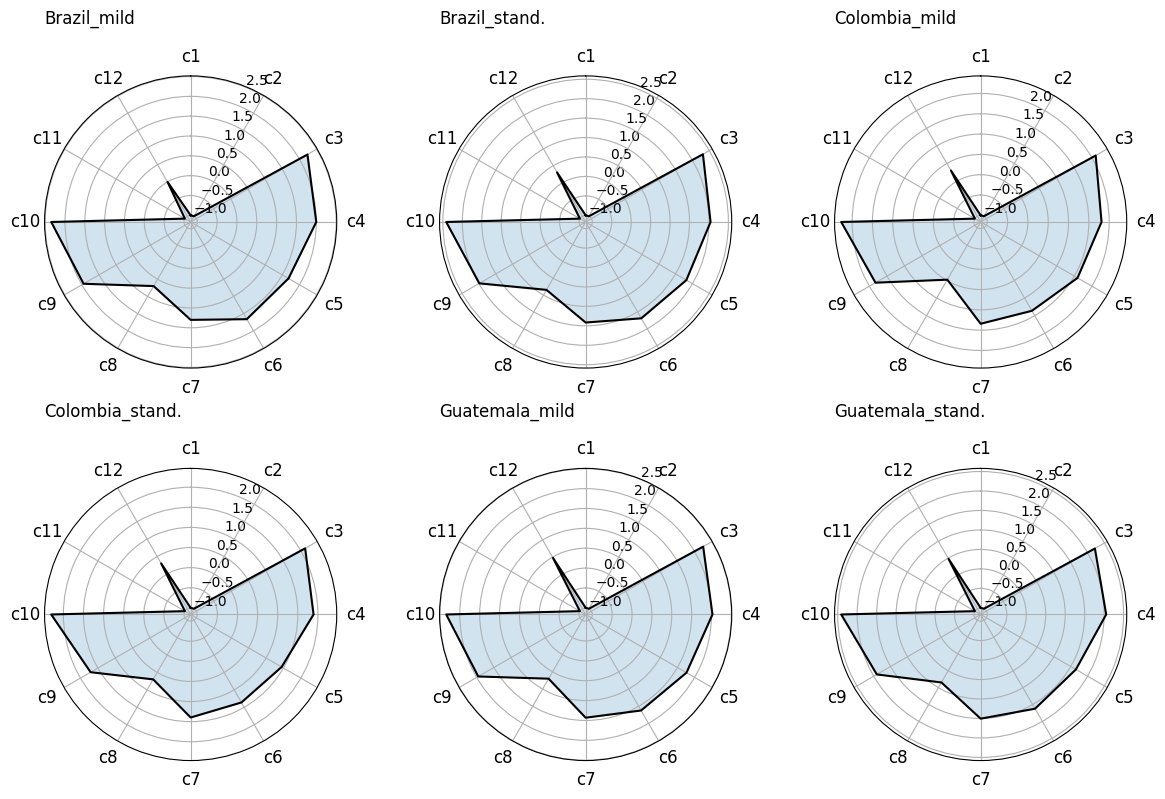

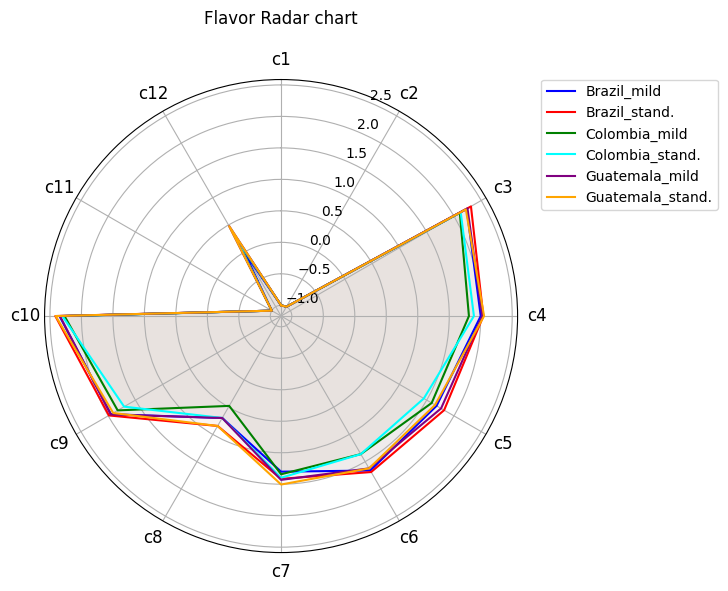

In [ ]:
np_values = df_pivot.T.values
lclass = tasks
lsamp = df_pivot.T.index.to_list()
rchrt4(np_values,lclass,lsamp)
